# Advanced Certification in AIML
## A Program by IIIT-H and TalentSprint

## Learning Objective:

   
  At the end of the experiment, you will be able to :
    
  * Understand various types of gradient descent approaches (Stochastic, Mini-Batch Gradient Descent) and there differences.


In [0]:
#@title Experiment Walkthrough
#@markdown Gradient descent and learning rate variations
from IPython.display import HTML
HTML("""<video width='520' height='240' controls>
<source src="https://cdn.talentsprint.com/aiml/AIML_BATCH_HYD_7/Week_1/stochastic_minibatch_gradient_descent.mp4" type='video/mp4'>
</video>""")

## Dataset

### Description


The dataset consists of two columns and 89 rows. Each column represents a characteristic of a simple pendulum i.e l (length) and t (time period). The dataset describes the relationship between the l and t which is  L∝T2 .


## Domain Information
   


In a simple pendulum, the length is directly proportional to the square of the time period of oscillation( $ 𝐿∝𝑇^2$).

The relationship $𝐿∝𝑇^2$ is represented below:

<img src="https://cdn.talentsprint.com/aiml/Experiment_related_data/IMAGES/LR.png">

##AI/ML Technique

#### Gradient Descent

Gradient Descent is used while training a machine learning model. It is an optimization algorithm, based on a convex function, that tweaks it’s parameters iteratively to minimize a given function to its local minimum.

To know more about Gradient Descent and its variants you can refer the below link:

https://towardsdatascience.com/gradient-descent-in-a-nutshell-eaf8c18212f0

## Keywords



* Stochastic Gradient Descent
* Scipy
* Sklearn
* mini batch Gradient Descent
* Plotting Error vs Iteration

#### Expected Time : 90 mins

### Setup Steps

In [0]:
#@title Please enter your registration id to start: (e.g. P181900101) { run: "auto", display-mode: "form" }
Id = "P181902118" #@param {type:"string"}


In [0]:
#@title Please enter your password (normally your phone number) to continue: { run: "auto", display-mode: "form" }
password = "8860303743" #@param {type:"string"}


In [4]:
#@title Run this cell to complete the setup for this Notebook
from IPython import get_ipython

ipython = get_ipython()
  
notebook="BLR_M1W2E3_Stochastic_Minibatch_GD" #name of the notebook

def setup():
#  ipython.magic("sx pip3 install torch") 
    ipython.magic("sx wget https://cdn.talentsprint.com/aiml/Experiment_related_data/week1/Exp1/AIML_DS_REGR01_SIMPLEPENDULUMOSCILLATIONDATA.txt")
    from IPython.display import HTML, display
    display(HTML('<script src="https://dashboard.talentsprint.com/aiml/record_ip.html?traineeId={0}&recordId={1}"></script>'.format(getId(),submission_id)))
    print("Setup completed successfully")
    return

def submit_notebook():
    
    ipython.magic("notebook -e "+ notebook + ".ipynb")
    
    import requests, json, base64, datetime

    url = "https://dashboard.talentsprint.com/xp/app/save_notebook_attempts"
    if not submission_id:
      data = {"id" : getId(), "notebook" : notebook, "mobile" : getPassword()}
      r = requests.post(url, data = data)
      r = json.loads(r.text)

      if r["status"] == "Success":
          return r["record_id"]
      elif "err" in r:        
        print(r["err"])
        return None        
      else:
        print ("Something is wrong, the notebook will not be submitted for grading")
        return None

    elif getAnswer() and getComplexity() and getAdditional() and getConcepts():
      f = open(notebook + ".ipynb", "rb")
      file_hash = base64.b64encode(f.read())

      data = {"complexity" : Complexity, "additional" :Additional, 
              "concepts" : Concepts, "record_id" : submission_id, 
              "answer" : Answer, "id" : Id, "file_hash" : file_hash,
              "notebook" : notebook}

      r = requests.post(url, data = data)
      r = json.loads(r.text)
      print("Your submission is successful.")
      print("Ref Id:", submission_id)
      print("Date of submission: ", r["date"])
      print("Time of submission: ", r["time"])
      print("View your submissions: https://iiith-aiml.talentsprint.com/notebook_submissions")
      print("For any queries/discrepancies, please connect with mentors through the chat icon in LMS dashboard.")
      return submission_id
    else: submission_id
    

def getAdditional():
  try:
    if Additional: return Additional      
    else: raise NameError('')
  except NameError:
    print ("Please answer Additional Question")
    return None

def getComplexity():
  try:
    return Complexity
  except NameError:
    print ("Please answer Complexity Question")
    return None
  
def getConcepts():
  try:
    return Concepts
  except NameError:
    print ("Please answer Concepts Question")
    return None

def getAnswer():
  try:
    return Answer
  except NameError:
    print ("Please answer Question")
    return None

def getId():
  try: 
    return Id if Id else None
  except NameError:
    return None

def getPassword():
  try:
    return password if password else None
  except NameError:
    return None

submission_id = None
### Setup 
if getPassword() and getId():
  submission_id = submit_notebook()
  if submission_id:
    setup()
    from IPython.display import HTML
    HTML('<script src="https://dashboard.talentsprint.com/aiml/record_ip.html?traineeId={0}&recordId={1}"></script>'.format(getId(),submission_id))
  
else:
  print ("Please complete Id and Password cells before running setup")



Setup completed successfully


In [0]:
# Import the required Packages
import pandas as pd
import numpy as np
import scipy.stats as stat
%matplotlib notebook
from  matplotlib import pyplot as plt
import random
import time


### Read the data

In [7]:
# Load the data by using pandas read_csv()
data = pd.read_csv("AIML_DS_REGR01_SIMPLEPENDULUMOSCILLATIONDATA.txt", sep=" ", header=None, names=['l', 't'])
# Print the first 5 rows of dataframe 'data'
print(data.head())
# Print the last 5 rows of dataframe 'data'
print(data.tail())


      l        t
0  0.10  0.69004
1  0.11  0.69497
2  0.12  0.74252
3  0.13  0.75360
4  0.14  0.83568
       l       t
85  0.95  1.9841
86  0.96  2.0066
87  0.97  2.0493
88  0.98  2.0503
89  0.99  2.0214


In [0]:
# Get the length and time period values from the dataset
l = data['l'].values
t = data['t'].values
# Get the square of time period
tsq = t * t

**Stochastic gradient descent (Single sample)**

Instead of computing the sum of all gradients, stochastic gradient descent selects an observation uniformly at random.

 $y_i = mx_i + c$

$E$ = $(y - y_i)^2$

$\frac{\partial E }{\partial m}$ = $ -(y - (mx_i + c)) * x_i$

$\frac{\partial E }{\partial c}$ = $ -(y - (mx_i + c))$

In [0]:
"""
The function 'next_step' updates the values of m and c and calculates error. 
The loss is minimized due to the changed values of m and c.
The new values m, c and the minimized loss is returned.
"""
def next_step(x, y, m, c, eta):
    ycalc = m * x + c
    error = (y - ycalc) ** 2
    delta_m = -(y - ycalc) * x
    delta_c = -(y - ycalc)
    m = m - delta_m * eta
    c = c - delta_c * eta
    return m, c, error

"""
The function below takes a random index and at that index idx, we calculate the values of m,c and error.
We use one data point at a time x[idx],y[idx]
Here we call the funtion 'next_step' to which we pass a data point x[idx],y[idx]
"""
def one_loop_random(x, y, m, c, eta):
    # Making random idx
    random_idx = np.arange(len(y))
    np.random.shuffle(random_idx)
    # Training with random idx
    for idx in random_idx:
        m, c, e = next_step(x[idx], y[idx], m, c, eta)
        #print(m, c, e)
    return m,c,e
  
"""
The function below trains the data for 1000 iterations. 
In each iteration it calls the 'one_loop_random' function.
"""
def train_stochastic(x, y, m, c, eta, iterations=1000):
    for iteration in range(iterations):
        m, c, err = one_loop_random(x, y, m, c, eta)
    return m, c, err

## TRAIN

In [0]:
# Init m, c
m, c = 0, 0

In [0]:
# Learning rate
lr = 0.001

m = 4.12254 c = 0.0844642 Error = 0.0131756
m = 4.12955 c = 0.0804361 Error = 0.000752112
m = 4.13402 c = 0.0779951 Error = 8.11637e-06
m = 4.13678 c = 0.0763494 Error = 0.00987884
m = 4.13852 c = 0.075315 Error = 0.00719507
m = 4.13963 c = 0.0746956 Error = 0.00968723
m = 4.14032 c = 0.0742803 Error = 0.00190076
m = 4.14069 c = 0.073943 Error = 0.0101098
m = 4.14104 c = 0.0739341 Error = 0.00567341
m = 4.14124 c = 0.0738523 Error = 0.00974903


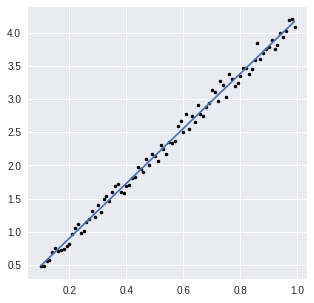

In [13]:
# Training for 1000 iterations, plotting after every 100 iterations:
%matplotlib inline
fig = plt.figure(figsize=(5, 5))
ax = fig.add_subplot(111)
plt.ion()
fig.show()
fig.canvas.draw()

# Call the train_stochastic() method to update m and c and get error value with lr = 0.001.
for num in range(10):
    m, c, error = train_stochastic(l, tsq, m, c, lr, iterations=100) # We will plot the error values for every 100 iterations
    print("m = {0:.6} c = {1:.6} Error = {2:.6}".format(m, c, error))
    y = m * l + c
    ax.clear()
    ax.plot(l, tsq, '.k')
    ax.plot(l, y)
    fig.canvas.draw()
    time.sleep(1)

**Ungraded Exercise 1: Experiment with other lr values.**



m = 4.06595 c = 0.116225 Error = 0.000747417
m = 4.1399 c = 0.075279 Error = 0.0268196
m = 4.14185 c = 0.0742619 Error = 0.00850891
m = 4.14267 c = 0.0758392 Error = 0.0420798
m = 4.14081 c = 0.0723905 Error = 0.0173445
m = 4.14229 c = 0.0744102 Error = 0.00453227
m = 4.14173 c = 0.074309 Error = 0.0267172
m = 4.14169 c = 0.0739238 Error = 0.00589874
m = 4.14118 c = 0.0733357 Error = 0.0018098
m = 4.1404 c = 0.0718653 Error = 0.012383


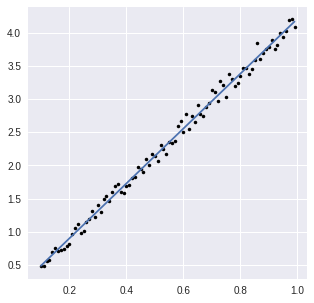

In [14]:
##Your Code Here
m, c = 0, 0

# Learning rate
lr = 0.008

# Training for 1000 iterations, plotting after every 100 iterations:
%matplotlib inline
fig = plt.figure(figsize=(5, 5))
ax = fig.add_subplot(111)
plt.ion()
fig.show()
fig.canvas.draw()

# Call the train_stochastic() method to update m and c and get error value with lr = 0.001.
for num in range(10):
    m, c, error = train_stochastic(l, tsq, m, c, lr, iterations=100) # We will plot the error values for every 100 iterations
    print("m = {0:.6} c = {1:.6} Error = {2:.6}".format(m, c, error))
    y = m * l + c
    ax.clear()
    ax.plot(l, tsq, '.k')
    ax.plot(l, y)
    fig.canvas.draw()
    time.sleep(1)

**Ungraded Exercise 2: plot Errors vs Iterations**

In [0]:
# Your Code Here
ms, cs,errs = [], [], []
m, c = 0, 0
lr = 0.001

# Call the train_stochastic() method to update m and c and get error value with lr = 0.001.
for times in range(100):
    m, c, error = train_stochastic(l, tsq, m, c, lr, iterations=100) # We will plot the error values for every 100 iterations
    ms.append(m)
    cs.append(c)
    errs.append(error)




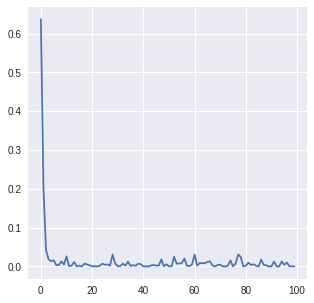

In [19]:
### Your Code Here
%matplotlib inline
fig = plt.figure(figsize=(5, 5))
ax = fig.add_subplot(111)
plt.ion()
fig.show()
fig.canvas.draw()

ax.plot(range(len(errs)), errs)
fig.canvas.draw()

**Ungraded Exercise 3 : Is this better than sequential gradient descent and vanilla gradient descent?**

Hint - check the error value at saturation, and time it takes to reach saturation.

In [20]:
#### Last Error at saturation: 0.004
print(errs[-1])

0.00013438406946343759


## PROBLEM

Problem with Sequential/Stochastic Gradient Descent is it does not scale well - it makes the same calculation of gradient descent on each sample. So the time taken will increase linearly with the number of samples. Many datasets have samples in the range of millions. Hence, even though it gives good results, it is not ideal.

We need a gradient descent formulation that gives the speed of vanilla gradient descent and the accuracy of sequential/stochastic gradient descent.

Next we will see **Minibatch Gradient Descent!**

### Minibatch Gradient Descent

In Mini-Batch Gradient Descent algorithm, rather than using  the complete data set, in every iteration we use a subset of training examples (called "batch") to compute the gradient of the cost function. 

Common mini-batch sizes range between 50 and 256, but can vary for different applications.

one_batch() : we will be calculating the essenial parts of the Gradient Descent method:  

$y_i = mx_i + c$
        
$E$ =$\frac{1}{n}$   $\sum_{i=1}^n (y - y_i)^2$

$\frac{\partial E }{\partial m}$ = $\frac{2}{n}$   $\sum_{i=1}^n  -x_i(y - (mx_i + c))$
 
$\frac{\partial E}{\partial c}$ = $\frac{2}{n}$   $\sum_{i=1}^n  -(y - (mx_i + c))$

one_step() : We will be splitting our data into batches.

In [0]:
"""
The function 'train_one_batch' updates the values of m and c and calculates error. 
The loss is minimized due to the changed values of m and c.
The new values m, c and the minimized loss is returned.
"""
def train_one_batch(x, y, m, c, eta):
    const = - 2.0/len(y)
    ycalc = m * x + c
    delta_m = const * sum(x * (y - ycalc))
    delta_c = const * sum(y - ycalc)
    m = m - delta_m * eta
    c = c - delta_c * eta
    error = sum((y - ycalc)**2)/len(y)
    return m, c, error

"""
The function below takes a batch_size and loss is calculated w.r.t batches.
The batches are created using random index.
The m, c and error values are calculated for each batch of data.
So, it calls the function 'train_one_batch' by passing batch_x, batch_y for each batch.
"""
def train_batches(x, y, m, c, eta, batch_size):
    # Making the batches
    random_idx = np.arange(len(y))
    np.random.shuffle(random_idx)
    
    # Train each batch
    for batch in range(len(y)//batch_size):
        batch_idx = random_idx[batch*batch_size:(batch+1)*batch_size]
        batch_x = x[batch_idx]
        batch_y = y[batch_idx]
        m, c, err = train_one_batch(batch_x, batch_y, m, c, eta)
    
    return m, c, err

"""
The function below trains the data for 1000 iterations. 
The data is traversed in batches, the batch size here is considered to be 10.
In each iteration it calls the 'train_batches' function. 
The 'batch_size' is passed as a parameter to 'train_batches'.
"""
def train_minibatch(x, y, m, c, eta, batch_size=10, iterations=1000):
    for iteration in range(iterations):
        m, c, err = train_batches(x, y, m, c, eta, batch_size)
    return m, c, err


#### TRAIN

In [0]:
# Init m, c
m, c = 0, 0

In [0]:
# Learning rate
lr = 0.1

In [0]:
# Batch size
batch_size = 10

In [0]:
%matplotlib inline
# Training for 1000 iterations, plotting after every 100 iterations:
fig = plt.figure(figsize=(5, 5))
ax = fig.add_subplot(111)
plt.ion()
fig.show()
fig.canvas.draw()

# Call the train_minibatch() method to update m and c and get error value with lr = 0.001 and batch_size=90.
for num in range(10):
    m, c, error = train_minibatch(l, tsq, m, c, lr, batch_size=90, iterations=100) # We will plot the error values for every 100 iterations
    print("m = {0:.6} c = {1:.6} Error = {2:.6}".format(m, c, error))
    y = m * l + c
    ax.clear()
    ax.plot(l, tsq, '.k')
    ax.plot(l, y)
    fig.canvas.draw()
    time.sleep(1)

**Ungraded Exercise 4: Experiment with other lr values.**

m = 1.28677 c = 1.54235 Error = 0.567336
m = 1.62739 c = 1.50603 Error = 0.438432
m = 1.87741 c = 1.37352 Error = 0.358112
m = 2.099 c = 1.24699 Error = 0.292845
m = 2.29864 c = 1.13234 Error = 0.239713
m = 2.47876 c = 1.02887 Error = 0.196459
m = 2.64127 c = 0.9355 Error = 0.161247
m = 2.78789 c = 0.851259 Error = 0.132582
m = 2.92019 c = 0.775251 Error = 0.109246
m = 3.03955 c = 0.706672 Error = 0.0902493


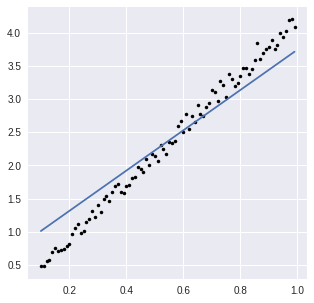

In [45]:
## Your Code Here
m, c = 0, 0
lr = 0.01
batch_size = 10
%matplotlib inline
# Training for 1000 iterations, plotting after every 100 iterations:
fig = plt.figure(figsize=(5, 5))
ax = fig.add_subplot(111)
plt.ion()
fig.show()
fig.canvas.draw()

# Call the train_minibatch() method to update m and c and get error value with lr = 0.001 and batch_size=90.
for num in range(10):
    m, c, error = train_minibatch(l, tsq, m, c, lr, batch_size=90, iterations=100) # We will plot the error values for every 100 iterations
    print("m = {0:.6} c = {1:.6} Error = {2:.6}".format(m, c, error))
    y = m * l + c
    ax.clear()
    ax.plot(l, tsq, '.k')
    ax.plot(l, y)
    fig.canvas.draw()
    time.sleep(1)

**Ungraded Exercise 5: Experiment with other batch_size values.**

num =  33


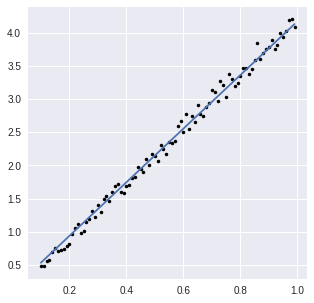

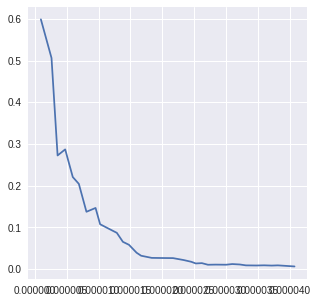

In [71]:
## Your Code Here

## Your Code Here
m, c = 0, 0
lr = 0.01
batch_size = 10
%matplotlib inline
# Training for 1000 iterations, plotting after every 100 iterations:
fig = plt.figure(figsize=(5, 5))
ax = fig.add_subplot(111)
plt.ion()
fig.show()
fig.canvas.draw()



errArr = []
timeArr = []
duration = 0
# Call the train_minibatch() method to update m and c and get error value with lr = 0.001 and batch_size=90.
for num in range(50):
    m, c, error = train_minibatch(l, tsq, m, c, lr, batch_size=50, iterations=100) # We will plot the error values for every 100 iterations
#     print("m = {0:.6} c = {1:.6} Error = {2:.6}".format(m, c, error))
    
    start = time.time()
    stop = time.time()
    duration += (stop-start)
#     print(duration)
    errArr.append(error)
    timeArr.append(duration)
  
    
    
    y = m * l + c
    ax.clear()
    ax.plot(l, tsq, '.k')
    ax.plot(l, y)
    fig.canvas.draw()
    
    if(0.006 < error <0.007):
      print("num = ", num)
      break
#     time.sleep(1)

fig = plt.figure(figsize=(5, 5))
ax = fig.add_subplot(111)
plt.ion()
fig.show()
fig.canvas.draw()
ax.plot(timeArr, errArr)
fig.canvas.draw()
    



#### Plotting error vs iterations

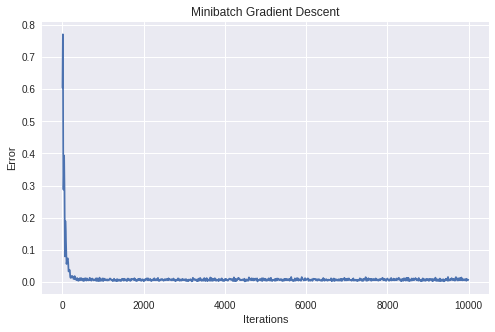

In [66]:
%matplotlib inline

ms, cs,errs = [], [], []
m, c = 0, 0
lr = 0.001
batch_size = 10

# Call the train_minibatch() method to update m and c and get error value with lr = 0.001 and batch_size = 10.
for times in range(1000):
    m, c, error = train_minibatch(l, tsq, m, c, lr, batch_size, iterations=100) # We will plot the error values for every 100 iterations
    ms.append(m)
    cs.append(c)
    
    errs.append(error)
    
# plot Errors vs Iterations
epoch = range(0, 10000, 10)
plt.figure(figsize=(8, 5))
plt.plot(epoch, errs)
plt.xlabel("Iterations")
plt.ylabel("Error")
plt.title("Minibatch Gradient Descent")
plt.show()

**Ungraded Exercise 6: Is this better than sequential gradient descent and vanilla gradient descent?**

Hint - check the error value at saturation, and time it takes to reach saturation.

num =  41
num =  7


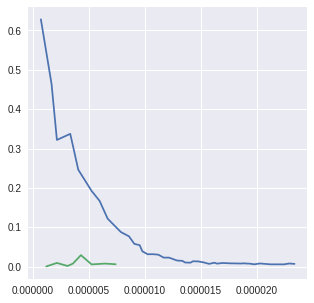

In [85]:
#### Last Error at saturation: 0.006
## Your Code Here
# mini batch vs SGD

m, c = 0, 0
lr = 0.01
batch_size = 10


errArr = []
timeArr = []
duration = 0
# Call the train_minibatch() method to update m and c and get error value with lr = 0.001 and batch_size=90.
for num in range(50):
    m, c, error = train_minibatch(l, tsq, m, c, lr, batch_size=50, iterations=100) # We will plot the error values for every 100 iterations
#     print("m = {0:.6} c = {1:.6} Error = {2:.6}".format(m, c, error))
    
    start = time.time()
    stop = time.time()
    duration += (stop-start)
    
    errArr.append(error)
    timeArr.append(duration)
    
    y = m * l + c
    
    if(0.006 < error <0.007):
      print("num = ", num)
      break
#     time.sleep(1)

fig = plt.figure(figsize=(5, 5))
ax = fig.add_subplot(111)
plt.ion()
fig.show()
fig.canvas.draw()
ax.plot(timeArr, errArr)
fig.canvas.draw()

#######################
##Your Code Here
m, c = 0, 0
lr = 0.008



errArr = []
timeArr = []
duration = 0
# Call the train_stochastic() method to update m and c and get error value with lr = 0.001.
for num in range(50):
    m, c, error = train_stochastic(l, tsq, m, c, lr, iterations=100) # We will plot the error values for every 100 iterations
#     print("m = {0:.6} c = {1:.6} Error = {2:.6}".format(m, c, error))
    start = time.time()
    stop = time.time()
    duration += (stop-start)

    errArr.append(error)
    timeArr.append(duration)  
    y = m * l + c
    if(0.006 < error <0.007):
      print("num = ", num)
      break

# fig = plt.figure(figsize=(5, 5))
# ax = fig.add_subplot(111)
# plt.ion()
# fig.show()
# fig.canvas.draw()
ax.plot(timeArr, errArr)
fig.canvas.draw()


### Please answer the questions below to complete the experiment:

In [0]:
#@title For very large datasets, which of the following gradient descent methods is recommended? { run: "auto", form-width: "500px", display-mode: "form" }
Answer = "Mini-batch" #@param ["Stochastic","Mini-batch","Batch"]


In [0]:
#@title How was the experiment? { run: "auto", form-width: "500px", display-mode: "form" }
Complexity = "Good and Challenging me" #@param ["Too Simple, I am wasting time", "Good, But Not Challenging for me", "Good and Challenging me", "Was Tough, but I did it", "Too Difficult for me"]


In [0]:
#@title If it was very easy, what more you would have liked to have been added? If it was very difficult, what would you have liked to have been removed? { run: "auto", display-mode: "form" }
Additional = " good" #@param {type:"string"}

In [0]:
#@title Can you identify the concepts from the lecture which this experiment covered? { run: "auto", vertical-output: true, display-mode: "form" }
Concepts = "Yes" #@param ["Yes", "No"]

In [64]:
#@title Run this cell to submit your notebook for grading { vertical-output: true }
try:
  if submission_id:
      return_id = submit_notebook()
      if return_id : submission_id =return_id
  else:
      print("Please complete the setup first.")
except NameError:
  print ("Please complete the setup first.")

Your submission is successful.
Ref Id: 2638
Date of submission:  23 Mar 2019
Time of submission:  13:10:19
View your submissions: https://iiith-aiml.talentsprint.com/notebook_submissions
For any queries/discrepancies, please connect with mentors through the chat icon in LMS dashboard.
